In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [69]:
df=pd.read_csv('vedio_games_sales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [71]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

 # Data Processing #

In [73]:
      # Changing data type of date #
print(df['Year'].dtype)

float64


In [75]:
df['Year'] = pd.to_datetime(df['Year'])

In [76]:
df['Year'] = pd.to_datetime(df['Year'], errors='coerce')

In [77]:
print(df['Year'].dtype)

datetime64[ns]


In [79]:
  ## separating the year ##
df['release_year'] = df['Year'].dt.year

In [80]:
df['release_year']

0        1970.0
1        1970.0
2        1970.0
3        1970.0
4        1970.0
          ...  
16593    1970.0
16594    1970.0
16595    1970.0
16596    1970.0
16597    1970.0
Name: release_year, Length: 16598, dtype: float64

In [84]:
  ## dropping the whole date column ##
df.drop('Year',axis=1,inplace=True)

In [86]:
df

,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,release_year
0,1,Wii Sports,Wii,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,1970.0
1,2,Super Mario Bros.,NES,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1970.0
2,3,Mario Kart Wii,Wii,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,1970.0
3,4,Wii Sports Resort,Wii,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,1970.0
4,5,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,1970.0
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,1970.0
16594,16597,Men in Black II: Alien Escape,GC,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,1970.0
16595,16598,SCORE International Baja 1000: The Official Game,PS2,Racing,Activision,0.00,0.00,0.00,0.00,0.01,1970.0
16596,16599,Know How 2,DS,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,1970.0


In [87]:
           ## Checking null values #
df.isnull().sum()

Rank              0
Name              0
Platform          0
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
release_year    271
dtype: int64

In [88]:
           ## checking missing values ##
print(df['Publisher'].unique())
print(df['release_year'].unique())

['Nintendo' 'Microsoft Game Studios' 'Take-Two Interactive'
 'Sony Computer Entertainment' 'Activision' 'Ubisoft' 'Bethesda Softworks'
 'Electronic Arts' 'Sega' 'SquareSoft' 'Atari' '505 Games' 'Capcom'
 'GT Interactive' 'Konami Digital Entertainment'
 'Sony Computer Entertainment Europe' 'Square Enix' 'LucasArts'
 'Virgin Interactive' 'Warner Bros. Interactive Entertainment'
 'Universal Interactive' 'Eidos Interactive' 'RedOctane' 'Vivendi Games'
 'Enix Corporation' 'Namco Bandai Games' 'Palcom' 'Hasbro Interactive'
 'THQ' 'Fox Interactive' 'Acclaim Entertainment' 'MTV Games'
 'Disney Interactive Studios' nan 'Majesco Entertainment' 'Codemasters'
 'Red Orb' 'Level 5' 'Arena Entertainment' 'Midway Games' 'JVC'
 'Deep Silver' '989 Studios' 'NCSoft' 'UEP Systems' 'Parker Bros.' 'Maxis'
 'Imagic' 'Tecmo Koei' 'Valve Software' 'ASCII Entertainment' 'Mindscape'
 'Infogrames' 'Unknown' 'Square' 'Valve' 'Activision Value' 'Banpresto'
 'D3Publisher' 'Oxygen Interactive' 'Red Storm Entertainmen

In [92]:
        ## dropping nulls ##
df.dropna(inplace=True)

In [93]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
release_year    0
dtype: int64

In [95]:
  ## changing data type of separated year column ##
df['release_year'] = pd.to_datetime(df['release_year'])

In [98]:
df['release_year'] = df['release_year'].dt.year

In [99]:
df

,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,release_year
0,1,Wii Sports,Wii,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,1970
1,2,Super Mario Bros.,NES,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1970
2,3,Mario Kart Wii,Wii,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,1970
3,4,Wii Sports Resort,Wii,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,1970
4,5,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,1970
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,1970
16594,16597,Men in Black II: Alien Escape,GC,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,1970
16595,16598,SCORE International Baja 1000: The Official Game,PS2,Racing,Activision,0.00,0.00,0.00,0.00,0.01,1970
16596,16599,Know How 2,DS,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,1970


   ## Visualizations ##

## How much each genre earn at global level ? ##

           BAR CHART  

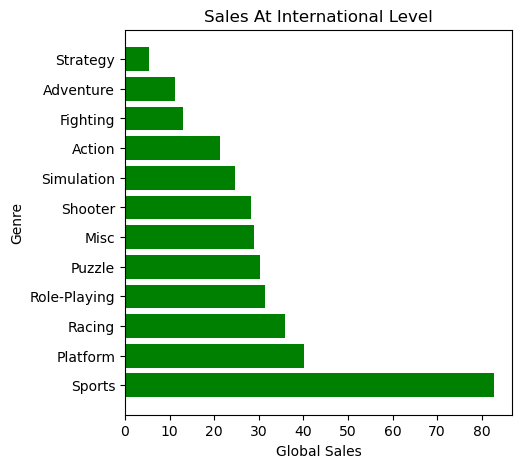

In [107]:
x=df['Genre']
y=df['Global_Sales']
plt.figure(figsize=(5,5))
plt.barh(x,y,color='green')
plt.xlabel('Global Sales')
plt.ylabel('Genre')
plt.title('Sales At International Level')
plt.show()

# What is the total sales of each game ? #

In [108]:
df['Total_Sales']=df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']+df['Global_Sales']

# How is the skewness ? #

      DISTPLOT

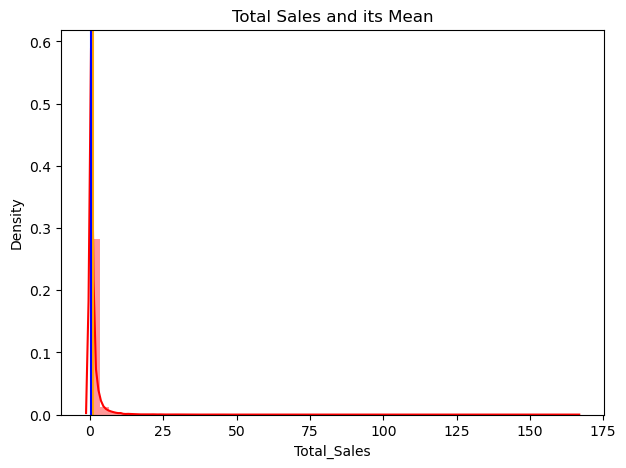

In [114]:
plt.figure(figsize=(7,5))
sns.distplot(df['Total_Sales'],color='red')
avg=df['Total_Sales'].mean()
med=df['Total_Sales'].median()
plt.axvline(avg,color='orange')
plt.axvline(med,color='blue')
plt.title('Total Sales and its Mean')
plt.show()

# To show correlation between all the variables #

            PAIR PLOT

<Figure size 600x600 with 0 Axes>

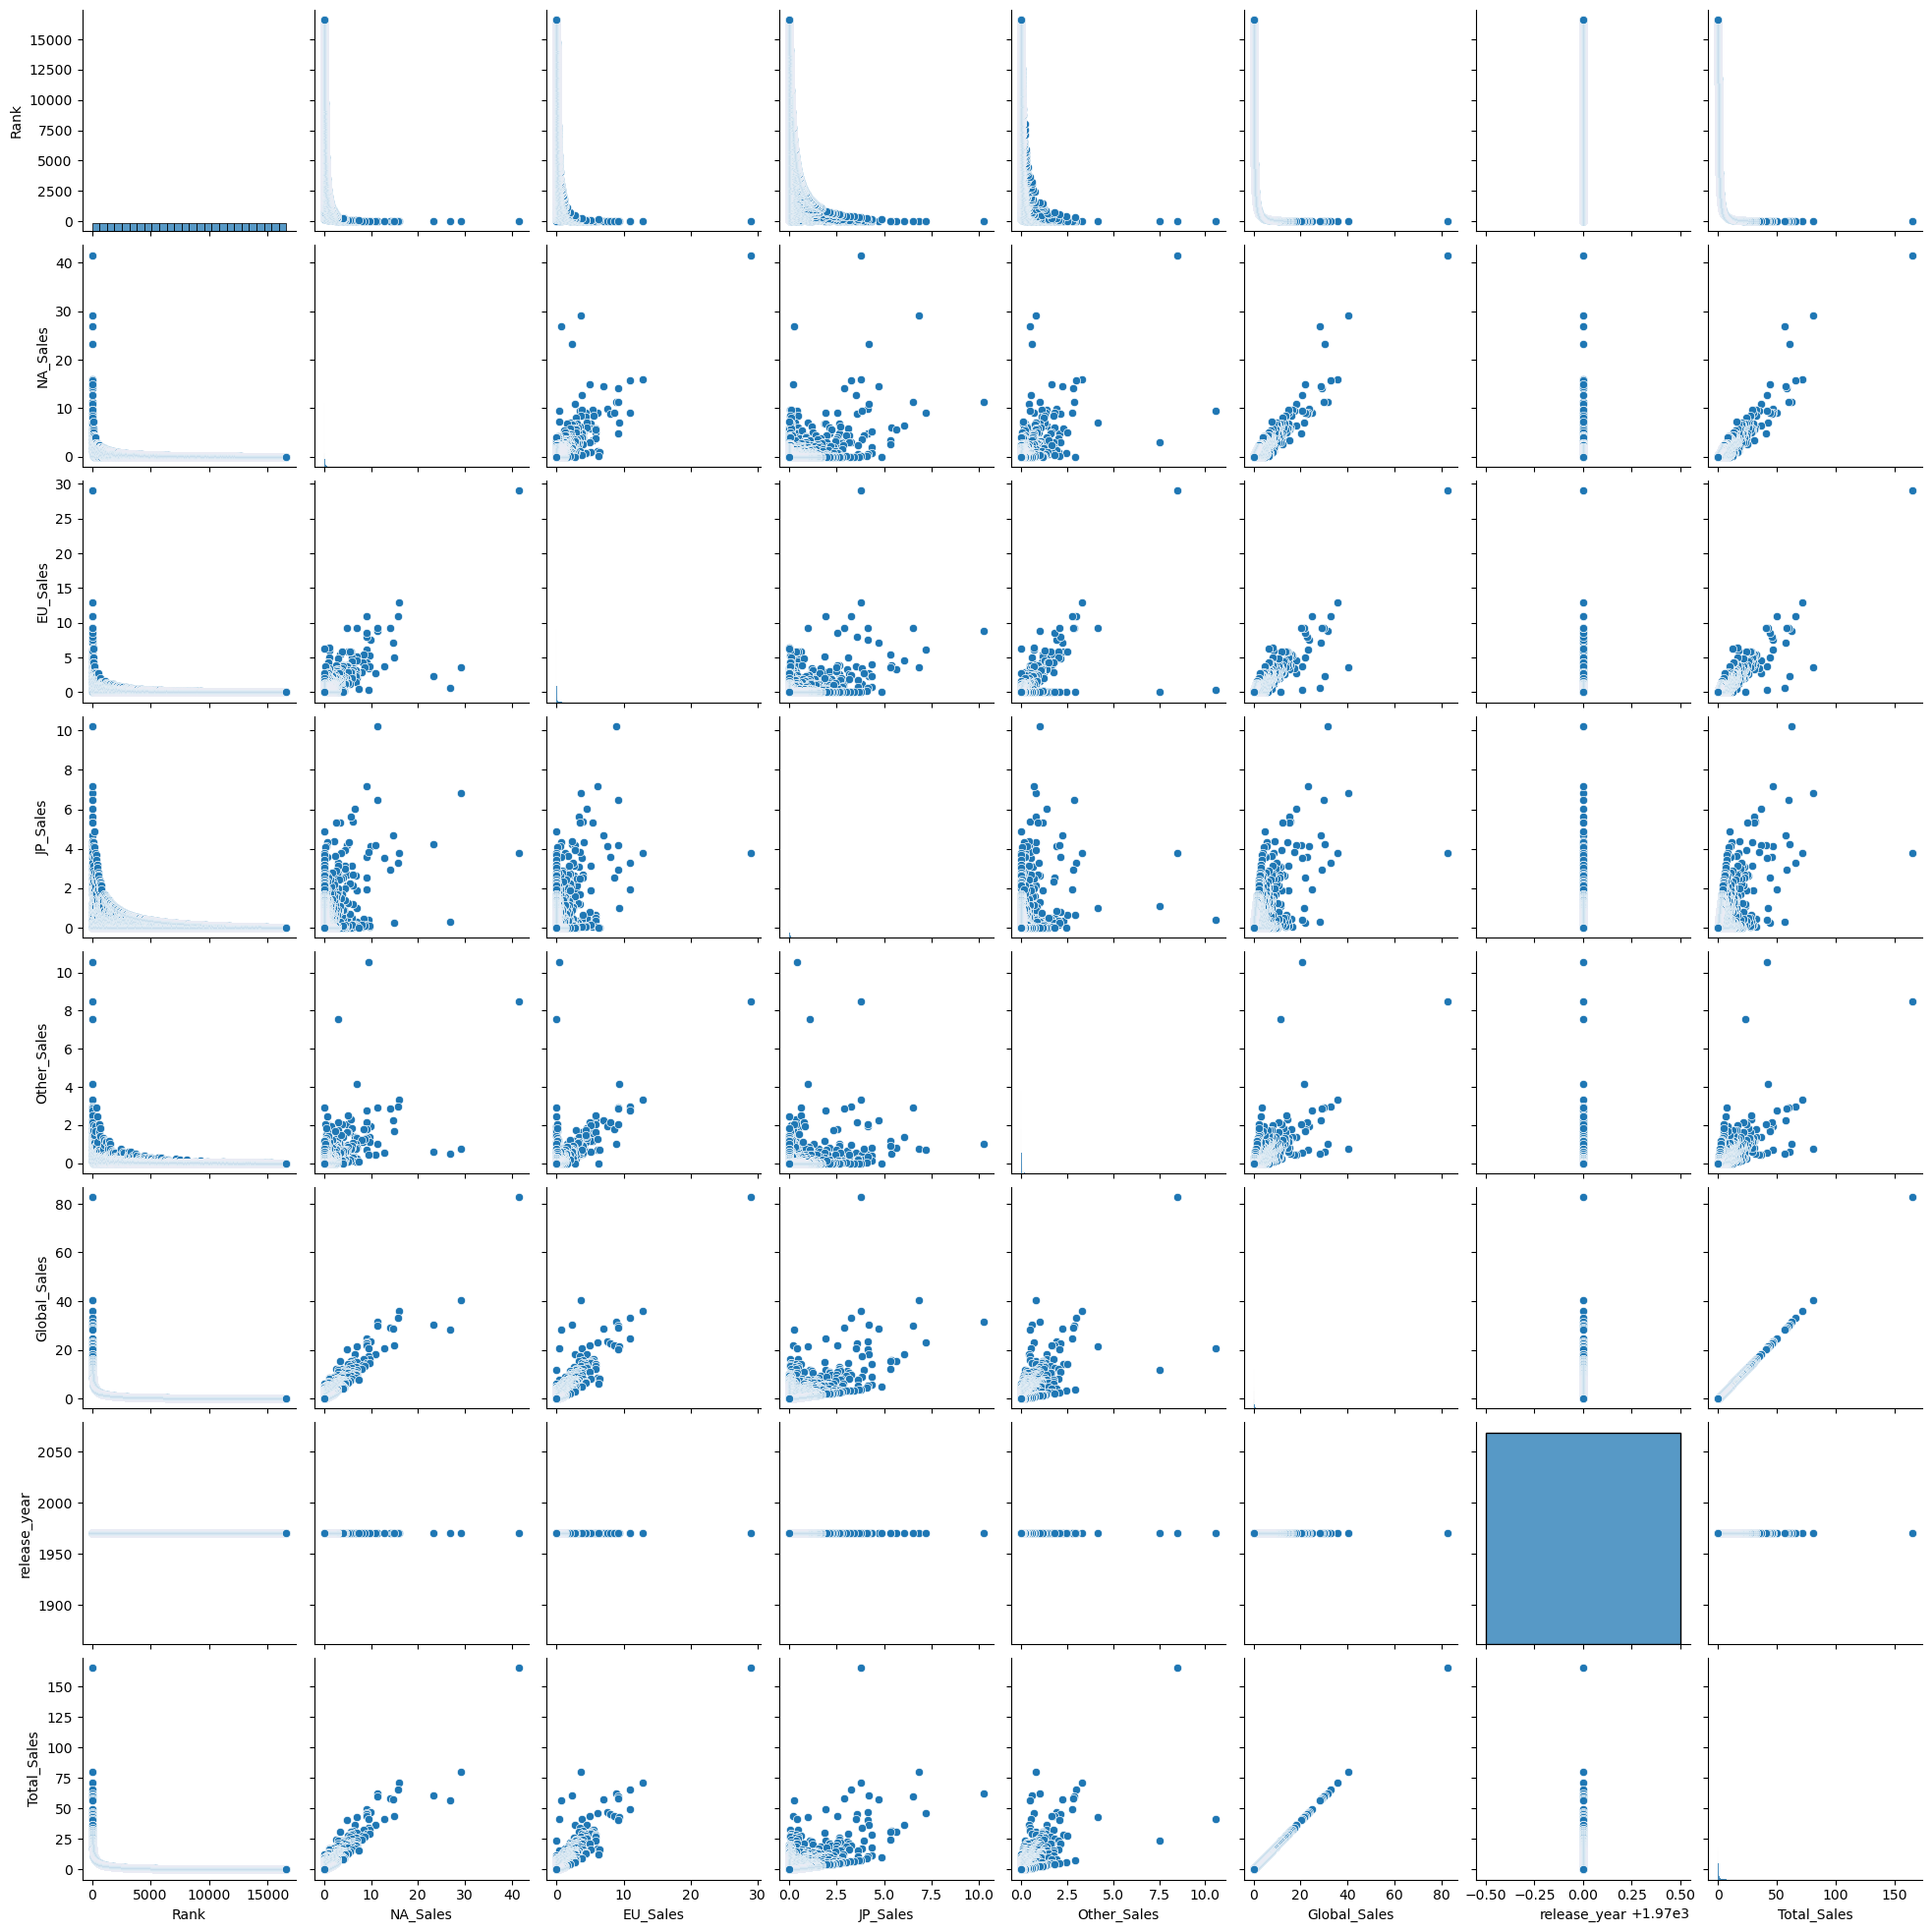

In [126]:
plt.figure(figsize=(6,6))
sns.pairplot(data=df)

# Correlation between North American sales and European sales #

          SCATTER PLOT

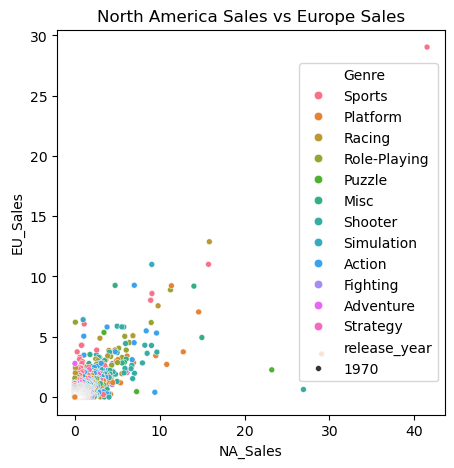

In [130]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=df,x='NA_Sales',y='EU_Sales',hue='Genre',marker='o',size='release_year')
plt.title('North America Sales vs Europe Sales')
plt.show()

# Production of various types of platforms #

        LINE PLOT

<Axes: xlabel='Platform'>

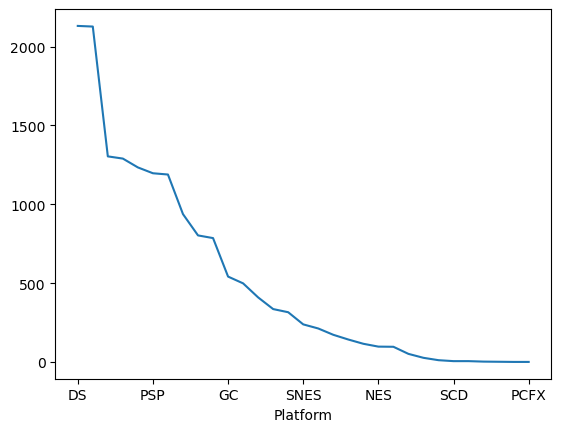

In [137]:
df['Platform'].value_counts().plot(kind='line')

# Games produced of particular genre #

          PIE CHART

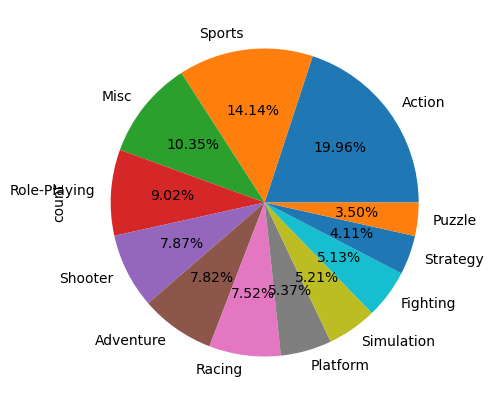

In [140]:
plt.figure(figsize=(5,5))
df['Genre'].value_counts().plot.pie(autopct='%1.2f%%')
plt.show()

# Gaming Platforms Sales At Global Level #

           COLUMN CHART       

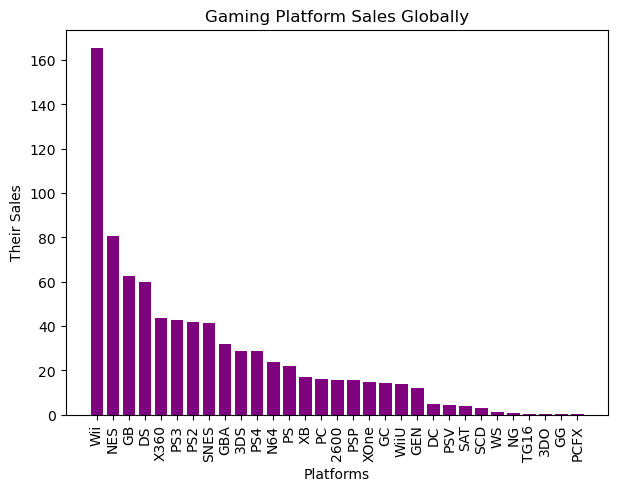

In [150]:
x=df['Platform']
y=df['Total_Sales']
plt.figure(figsize=(7,5))
plt.bar(x,y,color='Purple')
plt.xlabel('Platforms')
plt.ylabel('Their Sales')
plt.xticks(rotation=90)
plt.title('Gaming Platform Sales Globally')
plt.show()

# How much is the profit earned ? #

In [151]:
                    # Assume profit margin as 
profit_margin = 0.30

In [152]:
                    # Calculate profit 
df['Profit'] = df['Global_Sales'] * profit_margin

In [153]:
                  # Display the updated calculated Profit
print(df[['Publisher', 'Global_Sales', 'Profit']].head(10)) 

  Publisher  Global_Sales  Profit
0  Nintendo         82.74  24.822
1  Nintendo         40.24  12.072
2  Nintendo         35.82  10.746
3  Nintendo         33.00   9.900
4  Nintendo         31.37   9.411
5  Nintendo         30.26   9.078
6  Nintendo         30.01   9.003
7  Nintendo         29.02   8.706
8  Nintendo         28.62   8.586
9  Nintendo         28.31   8.493


# What is the correlation between total sales and profit ? #

In [157]:
df[['Total_Sales','Profit']].corr()

,Total_Sales,Profit
Total_Sales,1.000000,0.999999
Profit,0.999999,1.000000


# Which game was sold the most ? #

In [160]:
df['Name'].max()

'¡Shin Chan Flipa en colores!'

# Which game was sold the least ? #

In [161]:
df['Name'].min()

"'98 Koshien"

# Total how many genre were sold ? #

In [172]:
print(df['Genre'].count())

16291


# Who are the top 5 publishers of the games ? #

In [164]:
Publishers= df['Publisher'].value_counts()

In [165]:
Top_5=Publishers.head(5)
print(Top_5)

Publisher
Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
Name: count, dtype: int64


# Which are the least used platforms for playing games ? #

In [169]:
Platforms= df['Platform'].value_counts()

In [171]:
Least_5=Platforms.tail(5)
print(Least_5)

Platform
WS      6
3DO     3
TG16    2
GG      1
PCFX    1
Name: count, dtype: int64
